# <center>Đồ án 02 - Phân Tích Dữ Liệu</center>

## Mục lục
* [Bảng phân công công viêc](#c1)
* [Cách chạy Project](#c2)
* [Nội dung](#c3)
    * [Mong đợi những gì ở dữ liệu ?](#c31)
    * [Danh sách kiểm tra phân tích dữ liệu](#c32)
    * [Trả lời những câu hỏi về bộ dữ liệu](#c33)    
    * [Xóa dữ liệu](#c34)
        * [Dữ liệu có bị thiếu ?](#c341)
        * [Kiểu dữ liệu](#c342)
        * [Kiểm tra ngoại lệ](#c343)
        * [Tiền xử lý dữ liệu](#c344)
    * [Phân tích khám phá](#c35)
        * [Trực quan hoá mối quan hệ đơn biến](#c351)
            * [Line chart](#c3511)
            * [Histogram](#c3512)            
            * [Distplot](#c3513)
        * [Trực quan hoá mối quan hệ đa biến](#c352)
            * [Correlation matrix ](#c3521)
            * [Scatterplot](#c3522)
            * [Pie chart và Bar chart](#c3523)
            * [Jointplot](#c3524)
            * [Kde plot](#c3525)
* [Nguồn tham khảo](#c4)

## BẢNG PHÂN CÔNG CÔNG VIỆC <a class="anchor" id="c1"></a>

STT&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Thông tin sinh viên&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Mức độ hoàn thành&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Công việc
<br>
1&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;&nbsp;Nguyễn Đăng Thi-19127276&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;100%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&ensp;Scatterplot, Pie chart, Bar chart
<br>
2&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Lê Minh Trí-19127592&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;100%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&ensp;Histogram, Boxplot
<br>
3&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Phan Vĩ Giai-19127639&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;100%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&ensp;Xóa dữ liệu, Correlation Matrix
<br>
4&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;Võ Nhất Huy-19127642&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;&nbsp;100%&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&ensp;Trả lời câu hỏi về dữ liệu, Line chart

## CÁCH CHẠY PROJECT <a class="anchor" id="c2"></a>
**Chọn Kernel -> Restart & Run All**

## Nội dung <a class="anchor" id="c3"></a>

In [1]:
%matplotlib inline
import datetime
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
playlists_file = './Api_data/playlists.csv'
tracks_file = './Api_data/tracks.csv'
users_file = './Api_data/users.csv'

<strong>Biến toàn cục</strong>
<br>
Đọc dữ liệu dưới dạng DataFrame

In [3]:
df_playlists = pd.read_csv(playlists_file, delimiter='\t')
df_tracks = pd.read_csv(tracks_file, delimiter='\t')
df_users= pd.read_csv(users_file, delimiter='\t')

### Mong đợi những gì ở dữ liệu ? <a class="anchor" id="c31"></a>

Trước hết chúng ta đã xác định được rằng dữ liệu được sử dụng là lấy từ API data. Điều này có nghĩa là bộ dữ liệu thu thập được tương đối đầy đủ về các trường dữ liệu, cũng như về số lượng mẫu.
Vậy với lượng dữ liệu tương đối đầy đủ và chất lượng, ta có thể mong đợi điều gì?
- Xu hướng nghe nhạc của người dùng?
- Tỉ lệ của các thể loại nhạc trên soundcloud là bao nhiêu? thể loại nào đang chiếm xu thế?
- Có bao nhiêu người dùng đóng góp cho cộng đồng trên soundcloud (tạo track/playlist)?
- Có mối liên hệ nào giữa các trường dữ liệu (lượt nghe/like/share)?
- Sự phát triển của soundcloud thể hiện như thế nào qua các mốc thời gian?
- ...


### Danh sách kiểm tra phân tích dữ liệu <a class="anchor" id="c32"></a>

### Trả lời những câu hỏi về bộ dữ liệu <a class="anchor" id="c33"></a>

### Xóa dữ liệu <a class="anchor" id="c34"></a>

- Phần này chúng ta sẽ tập trung trả lời các câu hỏi sau:
    - Liệu dữ liệu chúng ta có bị thiếu ?
    - Các kiểu dữ liệu của chúng ta có phù hợp cho việc khám phá phía sau không ?
    - Nếu có thì các kiểu dữ liệu đó nên được xử lý như thế nào ?
    - Liệu tập dữ liệu với các trường hiện tại có đủ để trực quan ? Có cần tổng hợp nhiều trường khác nhau lại không ?
    - ...
- Đó là những câu hỏi đầu tiên mà chúng ta phải trả lời, phải giải quyết được các mối quan tâm phía trên. Nó là phần quan trọng để chúng ta có thể tiến hành trực quan hóa và khám phá dữ liệu ở bước tiếp theo

In [4]:
def get_object(file_name):
    df = pd.read_csv(file_name, delimiter='\t')
    obj = {}
    for column in df.columns:
        obj.setdefault(column, df[column].values)
    return obj

In [5]:
def get_object_formatted(cols):
    formatted_obj = {}
    for key in cols.keys():
        col_values = cols[key]
        missing_values = [x for x in col_values if x == '' or (not isinstance(x, str) and math.isnan(x))]
        values = [x for x in col_values if x != '' and not (not isinstance(x, str) and math.isnan(x))]
        formatted_obj[key] = [len(missing_values)/len(col_values) * 100, len(set(values)), set(values)]
    return formatted_obj

In [6]:
def print_info(obj):
    print(f"{'ColName':20} {'Miss(%)':7} {'NumDifVals':10} {'SomeVals'}")
    for col_name, col_profile in obj.items():
        print(f'{col_name:20} {col_profile[0]:<7.3f} {col_profile[1]:<10} {col_profile[2].__repr__()[:34]+"...":<}')

### Dữ liệu có bị thiếu ? <a class="anchor" id="c341"></a>

- Tạo object mới cho việc kiểm tra dữ liệu

In [7]:
playlists_obj = get_object_formatted(get_object(playlists_file))
tracks_obj = get_object_formatted(get_object(tracks_file))
users_obj = get_object_formatted(get_object(users_file))

In [8]:
print_info(playlists_obj)

ColName              Miss(%) NumDifVals SomeVals
id                   0.000   2175       {52264968, 729101, 39485458, 10671...
user_id              0.000   632        {7, 9, 11, 16, 17, 20, 21, 24, 25,...
title                0.000   2082       {'ORIGINALS', 'Polar Pair - album ...
created_at           0.000   2175       {'2020-11-07T15:18:33Z', '2021-05-...
last_modified        0.000   2138       {'2017-06-29T16:36:11Z', '2015-04-...
license              0.000   6          {'all-rights-reserved', 'cc-by', '...
likes_count          0.000   194        {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...
permalink_url        0.000   2175       {'https://soundcloud.com/petervanh...
public               0.000   1          {True}...
purchase_url         1.195   428        {'http://t.co/jtIJV8t7b8', 'http:/...
reposts_count        0.000   75         {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...
secret_token         0.000   1          {'None'}...
sharing              0.000   1          {'public'}...
tag_list       

**Dựa vào kết quả ở trên:**
- Cột "tag_list", "set_type" có phần trăm thiếu khá lớn: 62.207% và 67.402%. Theo suy đoán, do "tag_list" là thẻ tag được gắn cho playlist và "set_type" là loại playlist nên cả 2 cột này khi người dùng tạo playlist mới là thuộc tính tùy chọn. Có thể họ có thể quên, bỏ sót những thuộc tính không quan trọng này.
- Cột "trackIds" có phần trăm thiếu khoảng 7.908%. Con số này nói lên rằng, nhiều playlist được tạo nhưng không có track nào thuộc playlist đó.
- Tất cả các cột còn lại có phần trăm thiếu bằng 0 hay cực kì nhỏ nên mọi thứ "tốt đẹp".

In [9]:
print_info(tracks_obj)

ColName              Miss(%) NumDifVals SomeVals
id                   0.000   10242      {336297989, 44204041, 1140686857, ...
user_id              0.000   2768       {336748548, 19554314, 7184394, 258...
title                0.000   10190      {'Sarah Linhares - Step Up', '12 T...
description          17.874  6040       {'Drumcode Radio Live this week is...
track_format         0.000   1          {'single-track'}...
uri                  0.000   10242      {'https://api.soundcloud.com/track...
caption              0.000   132        {'Music is a feeling, expression a...
comment_count        0.000   569        {'121', '193', '218', '4646', '417...
created_at           0.000   9765       {'2021-06-05T16:32:05Z', '2016-09-...
duration             0.000   8435       {458752, 7372800, 327680, 98307, 0...
genre                13.451  1973       {'Electronica', 'live improvisatio...
last_modified        0.000   9107       {'2017-10-01T08:28:32Z', '2019-10-...
license              0.000   8   

**Dựa vào kết quả ở trên:**
- Cột "description", "genre" có phần trăm thiếu lần lượt là 17.874% và 13.451% cũng đáng để chúng ta xem xét. Cột "description" bị thiếu là do bài hát "bị bỏ quên" phần mô tả (mô tả là tùy chọn) và cũng tương tự với "genre", cột "genre" bị thiếu do bài hát không được gán nhãn thuộc thể loại nào.
- Các cột còn lại đều không bị thiếu.

In [10]:
print_info(users_obj)

ColName              Miss(%) NumDifVals SomeVals
id                   0.000   1763       {1, 2, 6, 7, 8, 9, 10, 11, 12, 15,...
username             0.000   1763       {'Gregorythme', 'twerok', 'Jónfrí'...
first_name           19.399  943        {'Magnus ', 'Jamie', 'Demian', 'Je...
last_name            27.907  1198       {'Jakobson', 'Makarainen', 'Michel...
full_name            18.945  1418       {'Damien Exton', 'Fredrik Georg  E...
city                 8.281   437        {'LONDON', 'Puebla', 'Dortmund', '...
avatar_url           0.000   1409       {'https://i1.sndcdn.com/avatars-00...
playlist_count       0.000   65         {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...
track_count          0.000   181        {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 515...
description          16.846  785        {"Been dj'ing and making music sin...
followers_count      0.000   961        {0, 2049, 1, 3, 4, 5, 6, 7, 8, 9, ...
followings_count     0.000   523        {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,...
groups_count   

**Dựa vào kết quả ở trên:**
- Đầu tiên, ta chú ý đến ba cột "first_name", "last_name", "full_name" đều có phần trăm thiếu khoảng 20%. Theo suy đoán thì có thể người dùng họ nhập dữ liệu cho 1 hoặc 2 trong 3 trường, do 3 trường này là thuộc tính tùy chọn. Nên họ nhập 1 trong 3 hay 2 trong 3 là đạt yêu cầu. Việc này dẫn đến phẩn trăm thiếu như trên.
- Cũng giống như tập dữ liệu "tracks", cột "description" bị thiếu khoảng 16.846% do người dùng không mô tả cho bản thân vì đây là trường tùy chọn (tùy theo sở thích của mỗi người).
- Cột "city" bị thiếu khoảng 8.281% cũng có ý nghĩa tương tự là do người dùng không khai báo thành phố nơi họ đang sống...

### Kiểu dữ liệu <a class="anchor" id="c342"></a>

**Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?**
- Ở đây, chúng ta xem xét kiểu dữ liệu của từng tập dữ liệu của chúng ta gồm: playlists, tracks, users.
- Và xem xét liệu có kiểu dữ liệu nào chưa phù hợp.

In [11]:
df_playlists.dtypes

id                int64
user_id           int64
title            object
created_at       object
last_modified    object
license          object
likes_count       int64
permalink_url    object
public             bool
purchase_url     object
reposts_count     int64
secret_token     object
sharing          object
tag_list         object
uri              object
set_type         object
is_album           bool
trackIds         object
dtype: object

**Đối với tập dữ liệu playlists**
- Các cột "id", "user_id", "likes_count", "reposts_count" có kiểu dữ liệu kiểu số là chính xác.
- Cột "title", "license", "permalink_url", "purchase_url", "secret_token", "sharing", "tag_list", "uri", "set_type", "is_album", "trackIds": các cột này có kiểu dữ liệu là chuỗi.
- Cột "created_at", "last_modified" hiện có dữ liệu là chuyển. Chúng ta cần chuyển từ kiểu dữ liệu dạng chuỗi sang datetime.

In [12]:
df_tracks.dtypes

id                 int64
user_id            int64
title             object
description       object
track_format      object
uri               object
caption           object
comment_count     object
created_at        object
duration           int64
genre             object
last_modified     object
license           object
likes_count       object
permalink_url     object
playback_count    object
reposts_count      int64
state             object
dtype: object

**Đối với tập dữ liệu tracks**
- Cột "id", "user_id", "duration", "reposts_count" có kiểu dữ liệu số.
- Cột "title", "description", "track_format", "uri", "caption", "genre", "license", "permalink_url", "state" có kiểu dạng chuỗi.
- Chúng ta cần chuyển lại kiểu dữ liệu chuỗi sang datetime cho các cột "created_at", "last_modified".
- Và các cột "comment_count", "likes_count", "playback_count" có kiểu dữ liệu chưa chính xác. Hiện các cột này đang có dữ liệu là chuỗi, chúng ta cần chuyển sang kiểu số. Lý do các cột này chưa chính xác là do các giá trị của cột bị thiếu, và gía trị mặc định của các giá trị thiếu là "None" nên ảnh hưởng đến kiểu dữ liệu của cột.

In [13]:
df_users.dtypes

id                       int64
username                object
first_name              object
last_name               object
full_name               object
city                    object
avatar_url              object
playlist_count           int64
track_count              int64
description             object
followers_count          int64
followings_count         int64
groups_count             int64
likes_count              int64
comments_count           int64
playlist_likes_count     int64
last_modified           object
created_at              object
verified                  bool
dtype: object

**Đối với tập dữ liệu users**
- Cột "id", "playlist_count", "track_count", "followers_count", "followings_count", "groups_count", "likes_count", "comments_count", "playlist_likes_count" đều có kiểu dữ liệu đúng với mong muốn của chúng ta là kiểu số.
- Cột "username", "first_name", "last_name", "full_name", "city", "avatar_url", "description" có kiểu dữ liệu là chuỗi là chính xác.
- Ta thấy cột "last_modified", "created_at" có kiểu dữ liệu là chuỗi. Chúng ta cần chuyển sang dạng datetime cho hai cột đó mới chính xác.

### Kiểm tra ngoại lệ <a class="anchor" id="c343"></a>

### Tiền xử lý dữ liệu <a class="anchor" id="c344"></a>

- Chúng ta sẽ xử lý các vấn đề bên trên đã nêu bao gồm:
    - Chuyển đổi chuỗi sang datetime cho 3 tập dữ liệu với các cột: "created_at" và "last_modified".
    - Chuyển đổi các cột có giá trị None thay thế bằng giá trị 0 và đổi kiểu dữ liệu của cột thành kiểu số cho tập dữ liệu "tracks" với 3 cột "comment_count", "likes_count", "playback_count".

In [14]:
def format_datetime(df):
    columns = ["created_at", "last_modified"]
    for column in columns:
        df[column] = pd.to_datetime(df[column])

In [15]:
format_datetime(df_playlists)
format_datetime(df_tracks)
format_datetime(df_users)

- Sau khi chuyển đổi chuỗi sang datetime cho tập dữ liệu, ta thử kiểm tra.

In [16]:
df_playlists.dtypes

id                             int64
user_id                        int64
title                         object
created_at       datetime64[ns, UTC]
last_modified    datetime64[ns, UTC]
license                       object
likes_count                    int64
permalink_url                 object
public                          bool
purchase_url                  object
reposts_count                  int64
secret_token                  object
sharing                       object
tag_list                      object
uri                           object
set_type                      object
is_album                        bool
trackIds                      object
dtype: object

In [17]:
df_tracks.dtypes

id                              int64
user_id                         int64
title                          object
description                    object
track_format                   object
uri                            object
caption                        object
comment_count                  object
created_at        datetime64[ns, UTC]
duration                        int64
genre                          object
last_modified     datetime64[ns, UTC]
license                        object
likes_count                    object
permalink_url                  object
playback_count                 object
reposts_count                   int64
state                          object
dtype: object

In [18]:
df_users.dtypes

id                                    int64
username                             object
first_name                           object
last_name                            object
full_name                            object
city                                 object
avatar_url                           object
playlist_count                        int64
track_count                           int64
description                          object
followers_count                       int64
followings_count                      int64
groups_count                          int64
likes_count                           int64
comments_count                        int64
playlist_likes_count                  int64
last_modified           datetime64[ns, UTC]
created_at              datetime64[ns, UTC]
verified                               bool
dtype: object

- Kiểu dữ liệu dạng datetime64. Vậy chúng ta đã hoàn thành bước chuyển kiểu dữ liệu sang datetime.
- Tiếp theo chúng ta sẽ chuyển những cột dữ liệu có dạng chuỗi chưa đúng sang dạng số.

In [19]:
def format_empty_vals(df):
    for column in df.columns:
        if 'count' in column:
            df[column] = df[column].replace('None', 0)
            df[column] = df[column].astype(str).astype(int)
        else:
            df[column] = df[column].replace(float('nan'), 'None')        

In [20]:
format_empty_vals(df_playlists)
format_empty_vals(df_tracks)
format_empty_vals(df_users)

- Sau khi chuyển đổi dữ liệu xong, ta thử kiểm tra lần nữa.

In [21]:
df_tracks.dtypes

id                              int64
user_id                         int64
title                          object
description                    object
track_format                   object
uri                            object
caption                        object
comment_count                   int64
created_at        datetime64[ns, UTC]
duration                        int64
genre                          object
last_modified     datetime64[ns, UTC]
license                        object
likes_count                     int64
permalink_url                  object
playback_count                  int64
reposts_count                   int64
state                          object
dtype: object

- Các cột "comment_count", "likes_count", "playback_count" có kiểu dữ liệu dạng chuỗi cũng đã được chuyển thành dạng kiểu số.
- Bây giờ chúng ta có thể trực quan dữ liệu chúng ta với các biểu đồ.

### Phân tích khám phá <a class="anchor" id="c35"></a>

- Sau khi hoàn thành quá trình kiểm tra kiểu dữ liệu, xem dữ liệu có bị thiếu không, có dữ liệu nào trùng không, dữ liệu của chúng ta đủ để khai thác và khám phá chưa ?
- Thì phần Phân Tích Khám Phá sẽ là phần chúng ta đặt những câu hỏi về bộ dữ liệu của chúng ta:
    - Liệu có bao nhiêu user được tạo qua từng năm ?
    - Mỗi user có bao nhiêu track ?
    - Những track có thời lượng dài ngắn như thế nào ?
    - Các track thuộc các thể loại khác nhau thì được phân phối như thế nào ?
    - Liệu một user có nhiều track thì đồng nghĩa sẽ có nhiều người theo dõi anh/chị ấy chăng ?
    - Và tương tự, môt user khi nghe bài hát đó, người đó like và có comment cho bài hát yêu thích của mình ?
    - Và chúng ta sẽ tìm ra các mối quan hệ giữa các trường của dữ liệu, xem những cặp trường nào có độ tương quan lớn nhất
    - ...
- Phần Phân Tích Khám Phá sẽ giải đáp cho chúng ta những câu hỏi thắc mắc về dữ liệu một cách trực quan nhất bằng những biểu đồ mô tả, so sánh dữ liệu bao gồm 2 nhóm biểu đồ:
    - Biểu đồ thể hiện mối quan hệ đơn biến:
        - [Line chart](#c3511)
        - [Histogram](#c3512)
        - [Distplot](#c3513)
    - Biểu đồ thể hiện mối quan hệ đa biến:
        - [Correlation matrix ](#c3521)
        - [Scatterplot](#c3522)
        - [Pie chart và Bar chart](#c3523)
        - [Jointplot](#c3524)
        - [Kde plot](#c3525)

#### Trực quan hoá mối quan hệ đơn biến <a class="anchor" id="c351"></a>

### Line chart <a class="anchor" id="c3511"></a>

- [Line chart](#c3511) là một biểu đồ thể hiện xu hướng của dữ liệu giúp ta biết được sự thay đổi của dữ liệu qua các giai đoạn.
- Ở trong phần này, chúng ta dùng [Line chart](#c3511) để hiểu được xu hướng và có được cái nhìn tổng quan cũng như nhận xét và trả lời được câu hỏi của chúng ta.

#### Số lượng track được tạo mới qua từng năm
Đối với số lượng track được tạo mới qua từng thời điểm, ta chỉ cần quan tâm tới cột dữ liệu <span style="color:orange">'create_at'.</span>
Trường này cho ta biết thời gian của 1 track được tạo, hay đúng hơn là được đăng lên soundcloud.
Với định dạng thời gian được đề cập ở đây là năm, ta cần làm những việc sau:
- Tạo 1 column khác bên ngoài DataFrame <span style="color:blue">df_tracks</span> với định dạng <span style="color:orange">%Y.</span>
- Gom nhóm các giá trị giống nhau lại, đồng thời tạo thêm 1 column khác chứa số lượng của các giá trị đặc trưng (các năm khác nhau) trong column đó.
- 2 cột vừa được tạo sẽ trở thành 1 DataFrame mới, đặt tên là <span style="color:blue">df_count_track_year</span>
- Dùng hàm pd.plot.line() để trực quan hóa, với trục x là các mốc theo năm, y là số lượng track được tạo trong năm

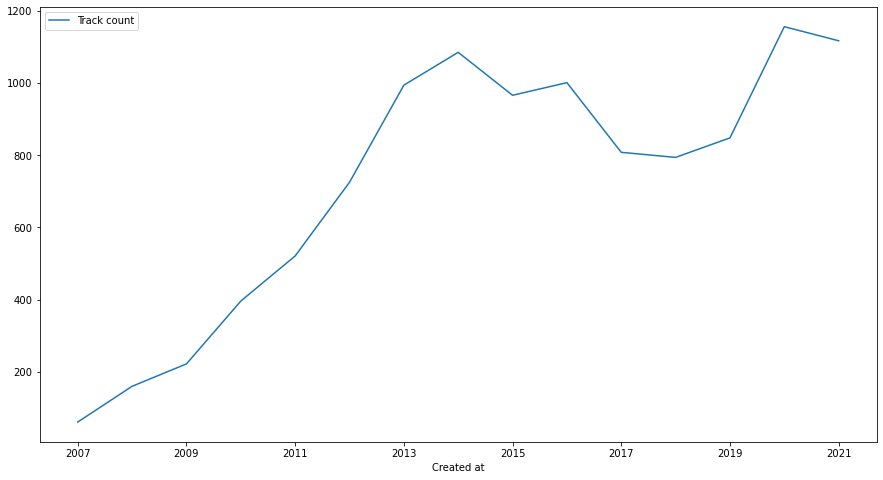

In [22]:
tmp_date = pd.DataFrame(columns = ["date"])
tmp_date['date'] = df_tracks['created_at'].dt.strftime('%Y')
df_count_track_year = tmp_date.groupby(['date']).size().reset_index().rename(columns={0:'track_count'})
df_count_track_year['date'] = pd.to_datetime(df_count_track_year['date'], format='%Y')
df_count_track_year['date'] = df_count_track_year['date'].dt.strftime('%Y')
df_count_track_year = df_count_track_year.sort_index()
year_graph = df_count_track_year.plot.line(x='date', y='track_count', figsize = (15, 8))
year_graph.set_xlabel('Created at')
year_graph.legend(["Track count"])

In [23]:
df_count_track_year['pct_change'] = df_count_track_year['track_count'].pct_change().round(decimals=4)*100
df_count_track_year

,date,track_count,pct_change
0,2007,61,NaN
1,2008,160,162.30
2,2009,222,38.75
3,2010,396,78.38
4,2011,521,31.57
5,2012,725,39.16
6,2013,994,37.10
7,2014,1085,9.15
8,2015,966,-10.97
9,2016,1001,3.62


##### Trong đó
- date: khoảng thời gian được tính (năm)
- track_count: số lượng track trong năm
- pct_change: % số lượng track thay đổi so với năm trước

In [24]:
year_max = df_count_track_year['track_count'].idxmax()
year_min = df_count_track_year['track_count'].idxmin()
print("Mean value track count: ", df_count_track_year['track_count'].mean())
df_count_track_year.loc[[year_max,year_min]]

Mean value track count:  723.6


,date,track_count,pct_change
13,2020,1156,36.32
0,2007,61,NaN


#### Nhận xét:
- Nhìn chung số lượng track được tạo thêm mỗi năm có xu hướng tăng dần do mức độ phổ biến tăng và số lượng người dùng tăng hàng năm
- Những năm đầu tiên của soundcloud có khá ít track được tạo
- Số lượng track được tạo vào năm 2017-2019 có sự suy giảm tương đối mạnh, sau đó tăng vọt trở lại vào đạt đỉnh vào 2020
- Trung bình mỗi năm có hơn 723 track được tạo trên soundcloud

#### Số lượng track được tạo mới qua từng tháng 
Tương tự với só lượng track tạo mới qua từng năm, số lượng track tạo mới qua từng tháng cũng được làm tương tự với <span style="color:blue">df_count_track_month</span>

Tuy nhiên, khác với mục đích nhìn một cách tổng quan về số lượng track được tạo qua từng năm, biểu đồ với từng tháng nhằm mục đích xem xét sự biến thiên về số track được tạo trong năm và so với các tháng trong năm trước.

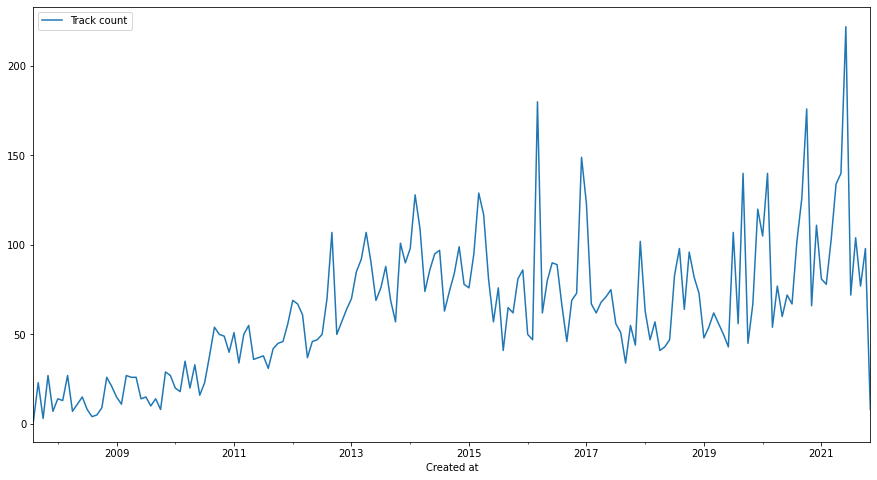

In [25]:
tmp_date = pd.DataFrame(columns = ["date"])
tmp_date['date'] = df_tracks['created_at'].dt.strftime('%m/%Y')
df_count_track_month = tmp_date.groupby(['date']).size().reset_index().rename(columns={0:'track_count'})
df_count_track_month['date'] = pd.to_datetime(df_count_track_month['date'], format='%m/%Y')
df_count_track_month = df_count_track_month.sort_values(by = "date")
month_graph = df_count_track_month.plot.line(x='date', y='track_count', figsize = (15, 8))
month_graph.set_xlabel('Created at')
month_graph.legend(["Track count"])

In [26]:
df_count_track_month['pct_change'] = df_count_track_month['track_count'].pct_change().round(decimals=4)*100
df_count_track_month

,date,track_count,pct_change
98,2007-08-01,1,NaN
113,2007-09-01,23,2200.00
128,2007-10-01,3,-86.96
143,2007-11-01,27,800.00
158,2007-12-01,7,-74.07
...,...,...,...
97,2021-07-01,72,-67.57
112,2021-08-01,104,44.44
127,2021-09-01,77,-25.96
142,2021-10-01,98,27.27


##### Trong đó
- date: khoảng thời gian được tính (tháng)
- track_count: số lượng track trong tháng
- pct_change: % số lượng track thay đổi so với tháng trước

In [27]:
month_max = df_count_track_month['track_count'].idxmax()
month_min = df_count_track_month['track_count'].idxmin()
print("Mean value track count: ", df_count_track_month['track_count'].mean())
df_count_track_month.loc[[month_max,month_min]]

Mean value track count:  63.104651162790695


,date,track_count,pct_change
83,2021-06-01,222,58.57
98,2007-08-01,1,NaN


#### Nhận xét:
- Như ở trên đã nói, số lượng track được tạo qua mỗi năm có xu hướng tăng dần. 
- Tuy nhiên với các tháng trong 1 năm thì sô lượng track được tạo không có xu hướng rõ ràng, số lượng giữa các tháng là không đồng đều, thậm chí độ biến thiên giữa số lượng các tháng còn rất lớn
- Tháng có số lượng track ít nhất ghi nhận được là 08/2007, tháng nhiều nhất là 06/2021 với 222 tracks. 
- Trung bình mỗi tháng có hơn 63 track được tạo trên soundcloud

### Histogram<a class="anchor" id="c3512"></a>

- [Histogram](#c3512) là một biểu diễn đồ họa tổ chức một nhóm các điểm dữ liệu thành các phạm vi do người dùng chỉ định. Tương tự như một biểu đồ cột, biểu đồ cô đọng một chuỗi dữ liệu thành một hình ảnh dễ hiểu bằng cách lấy nhiều điểm dữ liệu và nhóm chúng thành các phạm vi hoặc vùng hợp lý.
- [Histogram](#c3512) cho cái nhìn tổng quan về sự phân phối của dữ liệu, nhờ vào sự phân phối dễ hiểu, chúng ta có thể có được cái nhìn sơ bộ về độ phân phối các điểm trong tập dữ liệu của chúng ta

#### Sự phân bổ số lượng track của user

Bởi vì khoảng dữ liệu giữa các giá trị khá nhiều nên ta sẽ chia nhỏ ra các khoảng vừa đủ phù hợp cho từng tính chất dữ liệu

Đối với track count, ta sẽ có các giá trị min cũng như max là

In [4]:
df_users_track_count_chart = df_users['track_count']
print("Min:",df_users_track_count_chart.min())
print("Max:",df_users_track_count_chart.max())

Min: 0
Max: 1644


Nên ta sẽ chia ra các khoảng nhỏ, mỗi khoảng cách nhau 250 đơn vị, ta sẽ được các kiểu dữ liệu

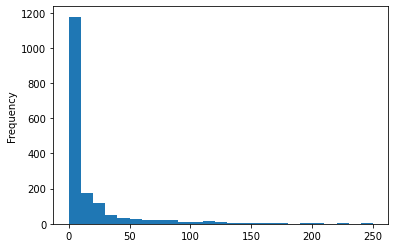

In [7]:
track_count_chart = df_users_track_count_chart.plot.hist(bins = 25,range=(0,250))

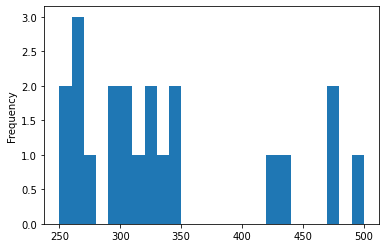

In [8]:
track_count_chart = df_users_track_count_chart.plot.hist(bins = 25,range=(250,500))

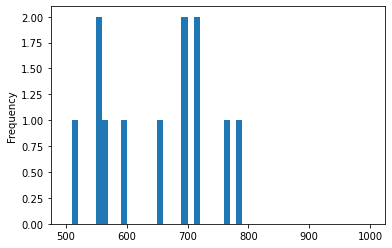

In [9]:
track_count_chart = df_users_track_count_chart.plot.hist(bins = 50,range=(500,1000))

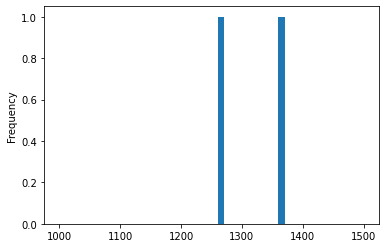

In [10]:
track_count_chart = df_users_track_count_chart.plot.hist(bins = 50,range=(1000,1500))

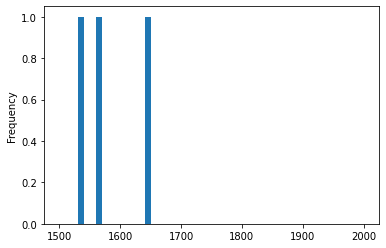

In [11]:
track_count_chart = df_users_track_count_chart.plot.hist(bins = 50,range=(1500,2000))

#### Nhận xét:

- Đối với trường dữ liệu track_count, số lượng xuất hiện nhiều nhất ở khoảng 0-250 nói chung và các số cận 0 nói riêng với gần 1200 lần xuất hiện. Đây cũng là khoảng chiếm phần lớn trong trường dữ liệu

- Khoảng 250-500, xuất hiện cao nhất chỉ có 3 lần nhưng các số được dàn trải hơn tức đa dạng về track_count hơn so với khoảng đầu tiên.

- Các khoảng còn lại trở nên thưa thớt cũng như số lượng thấp hơn nhiều, từ 1000 trở lên rất ít.

#### Sự phân bổ thời lượng (Duration) của track

In [12]:
df_tracks_duration = df_tracks['duration']
print("Min:",df_tracks_duration.min())
print("Max:",df_tracks_duration.max())

Min: 0
Max: 24113829


Với min = 0 và max = 24,113,829 , ta có thể chia các khoảng với cách biệt khác nhau như:
+ [0,10000]
+ [100000,1000000]
+ [1000000,10000000]
+ [10000000,24113829]

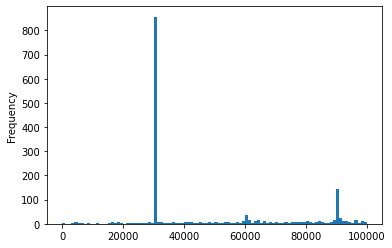

In [13]:
tracks_duration_chart = df_tracks_duration.plot.hist(bins=100,range=(0,100000))

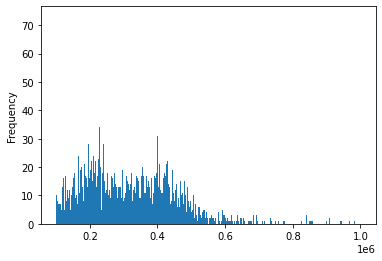

In [14]:
tracks_duration_chart = df_tracks_duration.plot.hist(bins=1000,range=(100000,1000000))

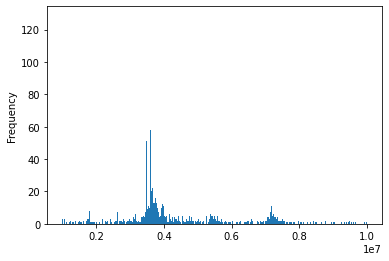

In [15]:
tracks_duration_chart = df_tracks_duration.plot.hist(bins=1000,range=(1000000,10000000))

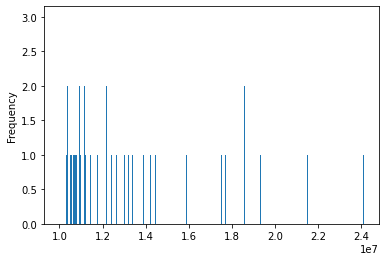

In [16]:
tracks_duration_chart = df_tracks_duration.plot.hist(bins=1000,range=(10000000,df_tracks_duration.max()))

#### Nhận xét:
Với các biểu đồ trên, ta có thể nhận thấy một số sự phân biệt rõ rệt:
+ Khoảng đầu tiên (0,100000), 30,000 chiếm tỉ lệ cao nhất và cũng cao nhất so với các số còn lại. Ngoài có sự tăng cao ở 90000 thì các số còn lại đều được dàn trải khá đều.
+ Khoảng thứ hai (100000,1000000), 100,000 đến 500,000 được phân bố rõ rệt, tần suất dao động từ 10 đến 40.
+ Khoảng thứ ba (1000000,10000000), các số 3,000,000 đến 4,000,000 tăng cao với tần suất cao nhất là 60 lần. Ngoài ra các thông số còn lại không có gì đặc biệt.
+ Khoảng cuối cùng (10000000, max), các con số đã thưa thớt khá nhiều và tần suất cao nhất được thể hiện là 2

#### Sự phân bổ số lượng Playback

In [17]:
df_tracks_playback_count = df_tracks['playback_count']
df_tracks_playback_count = pd.to_numeric(df_tracks_playback_count, errors='coerce').convert_dtypes()
print("Min:",df_tracks_playback_count.min())
print("Max:",df_tracks_playback_count.max())

Min: 0
Max: 221046895


Bởi vì có sự cách biệt khá lớn(max lên hằng trăm triệu), ta sẽ có cách chia như duration, qua một số lần thực nghiệm của em, ta có thể rút gọn lại:
+ [0,1000]
+ [1000,10000]
+ [10000,100000]
+ [100000,1000000]
+ [1000000,10000000]
+ [10000000,max]

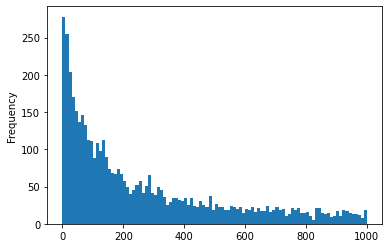

In [18]:
tracks_playback_count_chart = df_tracks_playback_count.plot.hist(bins = 100,range=(0,1000))

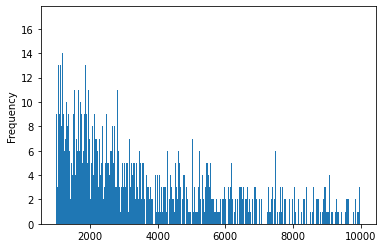

In [19]:
tracks_playback_count_chart = df_tracks_playback_count.plot.hist(bins = 1000,range=(1000,10000))

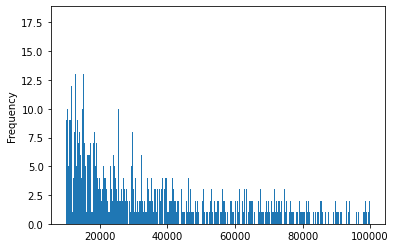

In [20]:
tracks_playback_count_chart = df_tracks_playback_count.plot.hist(bins = 1000,range=(10000,100000))

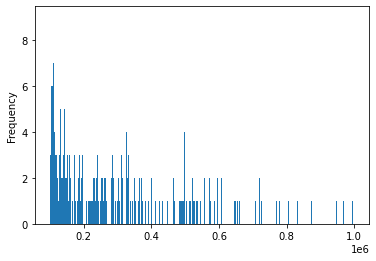

In [43]:
tracks_playback_count_chart = df_tracks_playback_count.plot.hist(bins = 1000,range=(100000,1000000))

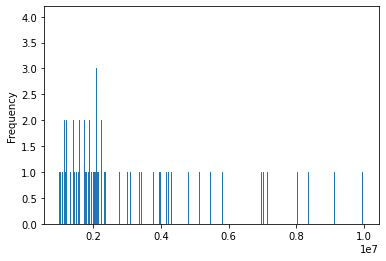

In [21]:
tracks_playback_count_chart = df_tracks_playback_count.plot.hist(bins = 1000,range=(1000000,10000000))

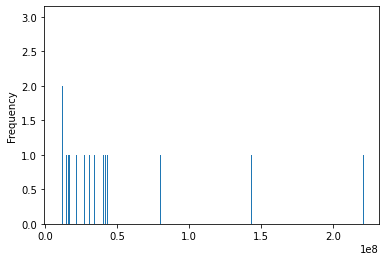

In [22]:
tracks_playback_count_chart = df_tracks_playback_count.plot.hist(bins = 1000,range=(10000000,df_tracks_playback_count.max()))

#### Nhận xét:
- Tất cả biểu đồ đều có xu hướng giảm hay nói tỷ lệ nghịch giữa tần suất xuất hiện và giá trị của trường dữ liệu playback_count

- Giá trị playback_count càng cao, tuần suất xuất hiện càng ít như khoảng cuối [10000000,max] chỉ có cao nhất là 2 trong khi khoảng đầu [0,10000] là gần 300 ở con số 0

### Distplot <a class="anchor" id="c3513"></a>

####  Sự thay đổi trong phân phối dữ liệu của thời lượng (Duration)

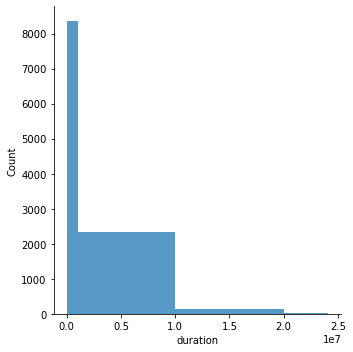

In [46]:
sns.displot(df_tracks_duration,bins=[0,1000,10000,1000000,10000000,20000000,df_tracks_duration.max()])

#### Nhận xét:
Đối với distplot ở trường dữ liệu Duration, nếu histogram ở các khoảng khác nhau thể hiện tỷ lệ khác nhau, displot lại có xu hướng tỷ lệ nghịch khi các số cận 0 ở mức 8000 trong khi các số sau đó giảm dần đều.

Tuy các số cận 0 xuất hiện rất nhiều nhưng sự đa dạng lại kéo dài tới dưới 10 triệu và bắt đầu có sự sụt giảm đáng kể khi từ 10 triệu tới 20 triệu chiếm rát ít, chỉ khoảng dưới 200.

Từ 20 triệu trở lên càng nhỏ tới mức khó có thể thấy và dừng lại ở cận 25 triệu. Ta có thể thấy phần lớn các track các playlist lấy được tập trung dưới 10 triệu s.

#### Trực quan hoá mối quan hệ đa biến <a class="anchor" id="c352"></a>

### Correlation Matrix <a class="anchor" id="c3521"></a>

- Trong [Correlation Matrix](#c3521), chúng ta trực quan dữ liệu để tìm mối quan hệ giữa các thuộc tính với nhau.
- Biểu đồ có dạng ma trận n x n số thuộc tính tổng cộng:
    - Nếu tại ô đó có giá trị càng lớn, thì độ tương quan của hai thuộc tính đó càng lớn (có mối quan hệ nào đó với nhau)
    - Nếu tại ô đó có giá trị càng nhỏ, thì độ tương quan giữa hai thụôc tính đó càng nhỏ (hai thuộc tính có vẻ không liên quan với nhau)

####  Tìm mối tương quan giữa các trường dữ liệu trong tập dữ liệu playlists

<AxesSubplot:>

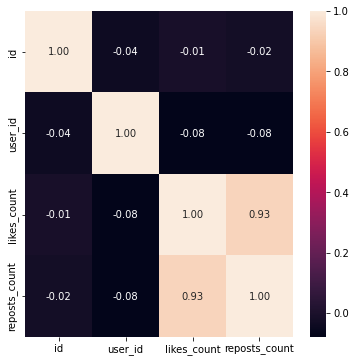

In [23]:
fig = plt.figure(figsize=(6,6))
corr = df_playlists.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

**Biểu đồ của tập dữ liệu playlists**
- Chúng ta thể hiện trực quan cho các thuộc tính số gồm: "id", "user_id", "likes_count", "reposts_count"
- Nhìn vào biểu đồ trên, ta thấy hai thuộc tính "reposts_count" và "likes_count" có giá trị lớn nhất. Có nghĩa là hai thuộc tính này có mối quan hệ nào đó với nhau. Ở đây ta có thể dự đoán rằng, nếu như bài hát được repost lại nhiều đồng nghĩa với số lượng người yêu thích bài hát đó cũng nhiều.
- Ngược lại, cặp thuộc tính với "id" và "user_id" thì có giá trị rất nhỏ. Nghĩa là mối quan hệ của các cặp đó hầu như không có.

####  Tìm mối tương quan giữa các trường dữ liệu trong tập dữ liệu tracks

<AxesSubplot:>

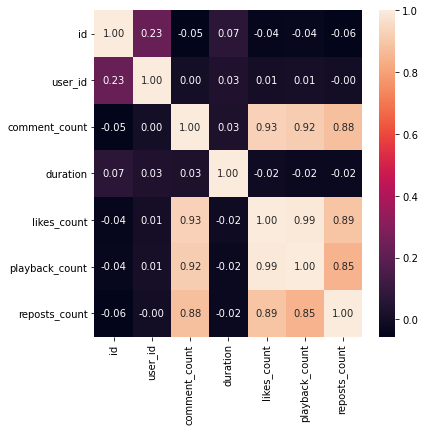

In [48]:
fig = plt.figure(figsize=(6,6))
corr = df_tracks.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

**Biểu đồ của tập dữ liệu tracks**
- Chúng ta thể hiện trực quan cho các thuộc tính số gồm: "id", "user_id", "comment_count", "duration", "likes_count", "playback_count", "reposts_count".
- Kết quả trên ta có thể thấy cặp thuộc tính "likes_count" và "playback_count" có giá trị 0.99 (gần bằng 1) cho thấy hai cặp thuộc tính này có độ tương quan rất lớn. Độ tương quan này có thể giải thích như sau, nếu như bài hát có số lượt nghe tăng nhiều đồng nghĩa với số lượng yêu thích mà người dùng bình chọn cũng tăng nhiều.
- Các cặp thuộc tính có độ tương quan lớn như: "comment_count" và "likes_count", "comment_count" và "reposts_count", "comment_count" và "playback_count", "likes_count" và "reposts_count", "playback_count" và "reposts_count". Các cặp thuôc tính này đều có giá trị độ tương quan trên 0.8, thể hiện mối quan hệ giữa từng thuộc tính chặt chẽ với nhau.
- Các cặp thuộc tinh còn lại được thể hiện với thuộc tính "id", "user_id" thì gần như không có độ tương quan nào cả. 

####  Tìm mối tương quan giữa các trường dữ liệu trong tập dữ liệu users

<AxesSubplot:>

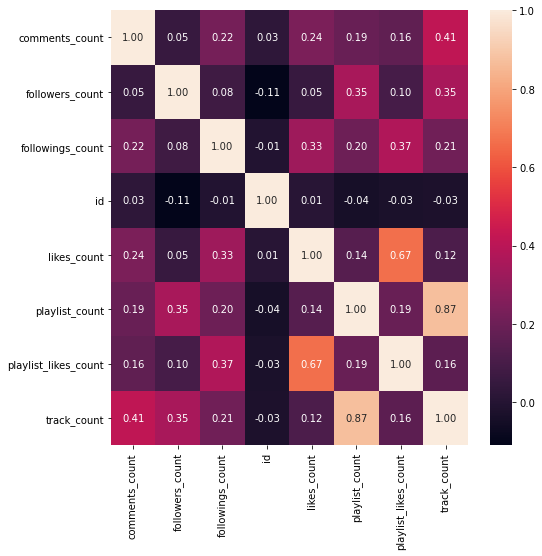

In [49]:
fig = plt.figure(figsize=(8,8))
corr = df_users[df_users.columns.difference(['groups_count'])]
corr = corr.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

**Biểu đồ của tập dữ liệu users**
- Chúng ta thể hiện trực quan cho các thuộc tính số gồm: "id", "comments_count", "followers_count", "followings_count", "likes_count", "playlist_count", "playlist_likes_count", "track_count".
- Nhìn vào giá trị của độ tương quan từ cao đến thấp:
    - Cặp thuộc tính "playlist_count" và "track_count" có giá trị 0.87. Điều này chỉ ra rằng chúng có mối tương quan chặt chẽ với nhau. Có thể giải thích độ tương quan này là nếu như một user có số lượng playlist càng nhiều, thì số lượng track của họ cũng tăng theo đó.
    - Độ tương quan trung bình là cặp thuộc tính "likes_count" và "playlist_likes_count", có giá trị 0.67. Điều này cho thấp độ tương quan của hai thuộc tính này là tương đối, có thể đúng hay có thể sai. Có thể giải thích độ tương quan này như sau: Giả sử một user có yêu thích bài hát đó, thì cũng đồng thời yêu thích cả playlist mà chứa bài hát đó.
    - Các cặp thuộc tính còn lại có độ tương quan thấp hơn, nên mối quan hệ giữa hai thuộc tính trong các cặp đó gần như là rời rạc.

### Scatter plot <a class="anchor" id="c3522"></a>

- Sau khi chúng ta tìm độ tương quan của các cặp dữ liệu bằng biểu đồ [Correlation matrix](#c3521) bên trên. Nhờ vào kết quả đó, chúng ta thấy được mối quan hệ giữa các biến trong 3 tập dữ liệu của chúng ta.
- Để có thể khám phá và có cái nhìn trực quan hơn, ở trong phần này chúng ta sẽ dùng một biểu đồ trong nhóm biểu đồ đa biến được gọi là [Scatterplot](#c3522)
- [Scatterplot](#c3522) là một loại biểu đồ hoặc sơ đồ toán học sử dụng tọa độ Descartes để hiển thị các giá trị cho hai biến điển hình cho một tập dữ liệu. Nhờ vào sự hiển thị của các điểm dữ liệu, ta có thể rút trích ra nhiều kết luận cho dữ liệu của chúng ta

#### Mối quan hệ giữa số lương track sở hữu bởi 1 user và số lượng người theo dõi của user đó

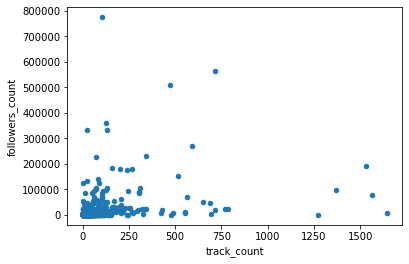

In [50]:
df_users.plot.scatter(x = 'track_count', y = 'followers_count');


#### Nhận xét:
- Biểu đồ trên trực quan hóa mối quan hệ giữa số lương track sở hữu bởi 1 user(track_count) và số lượng người theo dõi của user đó (follower_count)
- Nhìn vào biểu đồ ta thấy sự phấn đồng đều giữa giữa hai đại lượng trên,tức là không có mỗi quan hệ tỉ lệ giữa hai đại lượng trên
- Có những giá trị outline có số track và follower rất lớn nhưng không đáng kể , đó có thể là tài khoảng của những người nổi tiếng, hoặc tài khoản của cách công ty trong âm nhạc
- Đa số các user đều sở hữu dưới khoảng 400 bài và có lượng người theo dõi dưới khoảng 15000

Bỏ đi các giá trị outliner, ta chỉ xét các giá trị là một user bình thường

(0.0, 15000.0)

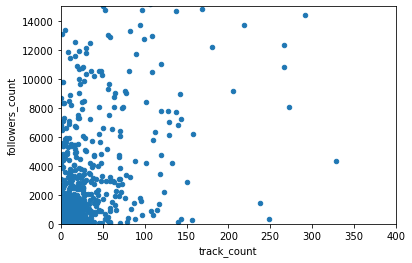

In [51]:
df_users.plot.scatter(x = 'track_count', y = 'followers_count');
plt.xlim([0, 400])
plt.ylim([0,15000 ])

#### Nhận xét:
- Ở nhiều đồ này , tan nhìn thấy rõ hơn mối quang hệ giữa ố lương track sở hữu bởi 1 user(track_count) và số lượng người theo dõi của user đó (follower_count)
- Với một user bình thường , đa số sợ hữu rất ít track ( khoảng dưới 50 ) với rất ít người theo dỗi
- Bên cạnh đó , cũng có cách tài khoảng có số lượng follower rất cao ( trên 2000 ) , mặc dù sợ hữa rất ít track, đây có thể là những nghệ sỹ ít nỗi tiếng hơn, có ít bài hát , nhưng là những hát có chất lượng tốt , dẫn đến số follower rất cao
- Tóm lại , số lương track sở hữu bởi 1 user và số lượng người theo dõi của user đó không có mỗi liên hệ với nhau , có thể chất lượng của track mới là yếu tố ảnh hưởng đến số lượng follower

#### Mối quan hệ tương quan giữa số lượt like và comment bởi một user

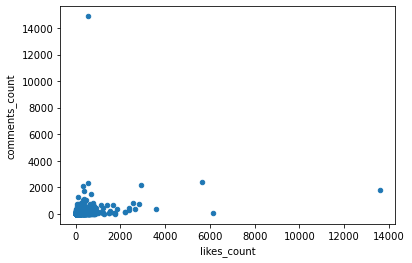

In [52]:
df_users.plot.scatter(x = 'likes_count', y = 'comments_count');

#### Nhận xét:
- Biểu đồ trên trực quan hóa mối quan hệ tương quan giữa số lượt like và comment bởi một user
- Nhìn vào biểu đồ thấy đa số các điểm phần phố đều và tập trung ở khoảng (0, 2000) cho số lượng comment và like
- Có tồn tại outliner những chiếm số lượng rất nhỏ

Ta sẽ loại bỏ đi giá trị outliner 

(0.0, 2000.0)

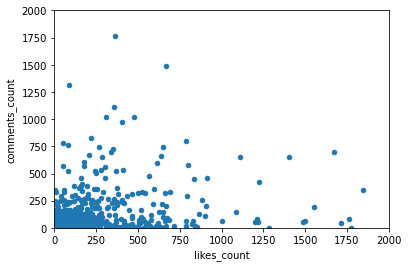

In [53]:
df_users.plot.scatter(x = 'likes_count', y = 'comments_count');
plt.xlim([0, 2000])
plt.ylim([0,2000 ])

#### Nhận xét:
- Sau khi đã loại bỏ outliner:
   - Đa số sô giá trị tập trung ở khoảng (0, 250) cho lượt comment , và ( 0,750 ) cho số lượt like
- Ta thấy cách giá trị vẫn phần bố đều trên biểu đ, chứng tổ sôl lượt like và comment không có mốt quan hệ tương quan với nhau
- Các giá trị tập trung đa số theo chiều ngang , điều này chứng tổ người dùng có xu hướng chọn tương tác bằng cách chọn like hơn là để lại comment

#### Mối quan hệ tương quan giữa số lượt nghe (playback) và thích (like) của bài hát (tracks)

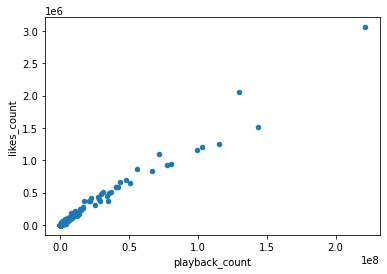

In [54]:
df_tracks.plot.scatter(x = 'playback_count', y = 'likes_count');

#### Nhận xét:
- Biểu đồ trên trực quan hóa mối quan hệ giữa lượt thích (like) và số lượt nghe (playback) trong tập dữ liệu tracks
- Nhờ sự đơn giản và trực quan hóa của biểu đồ, ta có thể thấy 2 trường trên có mối quan hệ đồng biến.
- Khi số lượng lượt nghe tăng, đồng nghĩa số lượng yêu thích của bài hát đó cũng tăng.
- Các điểm dữ liệu dường như nằm trên cùng một đường thẳng (linear), nó thể hiện độ tuyến tính của dữ liệu.
- Đây là một kết quả có thể giúp chúng ta dự đoán được các giá trị khác bằng cách áp dụng Linear Regression

### Pie chart và bar chart <a class="anchor" id="c3523"></a>

- [Pie chart](#c3523) cũng là một biểu đồ trong nhóm đa biến, một biểu đồ đồ họa thống kê hình tròn, được chia thành các phần để giải thích hoặc minh họa tỷ lệ số. Trong biểu đồ hình tròn, góc trung tâm, diện tích và độ dài cung của mỗi lát cắt tỷ lệ với số lượng hoặc tỷ lệ phần trăm mà nó biểu thị.
- [Bar chart](#c3523) là một phương tiện hữu ích trong việc mô tả (trực quan hóa) dữ liệu. Nó có thể được sử dụng để hiển thị số lượng (tức là tần suất) của các loại của một biến danh định hoặc thứ tự
- Ở trong phần này, chúng ta sử dụng [Pie chart](#c3523) và [Bar chart](#c3523) để biểu diễn dữ liệu của chúng ta, xem tập dữ liệu chúng ta được chia theo bao nhiêu thể loại, và mỗi thể loại sẽ chiếm bao nhiêu phần...

#### Tỉ lệ thành phần thể loại của các track trong mẫu dữ liệu

- Đầu tiên ta xem xét các thể loại tồn tại trong mẫu

In [55]:
df_tracks['genre'].head(1000)

0             Electronic
1             Electronic
2             Electronic
3             Electronic
4             Electronic
             ...        
995    OBM Records Prod.
996                House
997                 None
998           Electronic
999           Deep Disco
Name: genre, Length: 1000, dtype: object

In [56]:
df_tracks['genre'].describe()

count     10854
unique     1973
top        None
freq       1558
Name: genre, dtype: object

In [57]:
df_tracks["genre"].unique()

array(['Electronic', 'SuperSpeedPowerPop', 'None', ..., 'Gabriel Le Mar',
       'Electronic Music', 'TechHouse'], dtype=object)

- Thấy rằng có 10854 track , trong đó thuộc 1973 thể loại khác nhau , tuy nhiên đa số thể loại bị thiếu ( None ) , ta sẽ loại bổ các track có giá trị None

In [58]:
not_none=df_tracks["genre"]!='None'
df_tracks_notNull=df_tracks[not_none]

In [59]:
genre_count_series=df_tracks_notNull.groupby(['genre']).size()
genre_count_series

genre
"Dancepop" (Dance/Eurodance/Dancepop)    2
"Pop"                                    6
#BORDERLINE OBJEKTIV SUBJEKT             1
$ayonara.                                1
( ͡° ͜ʖ ͡°)                              1
                                        ..
♥                                        1
✌                                        1
❆❅❉                                      1
『drum+bass』                              1
宇多田ヒカル                                   1
Length: 1972, dtype: int64

- Tiếp theo , soundcloud cho phép người dùng tự dô đặt tả cho trường **thể loại** của track , nên sẽ tồn tại các thể loại vô nghĩa , ta sẽ loại bỏ chúng bằng cách chỉ chọn cách thể loại phổ biến , tức, số bài hết thuộc thể loại đó phải lớn hơn **100** 

In [60]:
genre_count_series= genre_count_series[genre_count_series>100].sort_values()
genre_count_series

genre
Pop            105
Disco          111
Ambient        204
Dance          236
Deep House     399
House          581
Techno        1089
Electronic    1546
dtype: int64

##### Biểu đồ Pie chart và Bar chart thể hiện sự phân bổ của các thể loại bài hát (track)

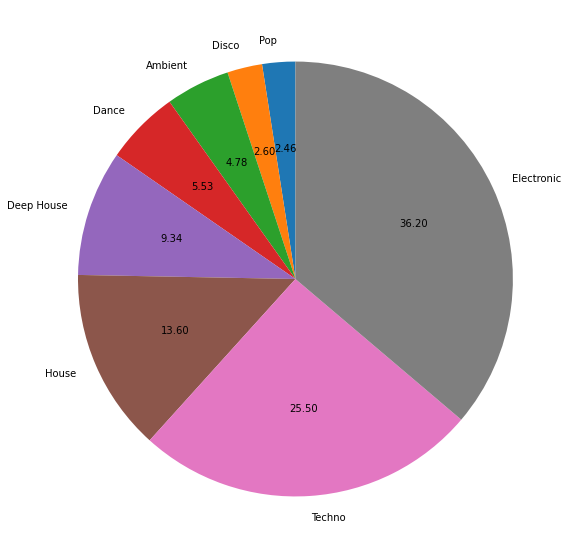

In [61]:
plt.figure(figsize=(10, 10), dpi=72)
plt.pie(genre_count_series,labels = genre_count_series.index, autopct='%1.2f',startangle=90)
plt.show()

- Để hiểu rõ hơn về số liệu, ta có thể dùng bar chart để biểu thị số lượng của từng thể loại trong mẫu

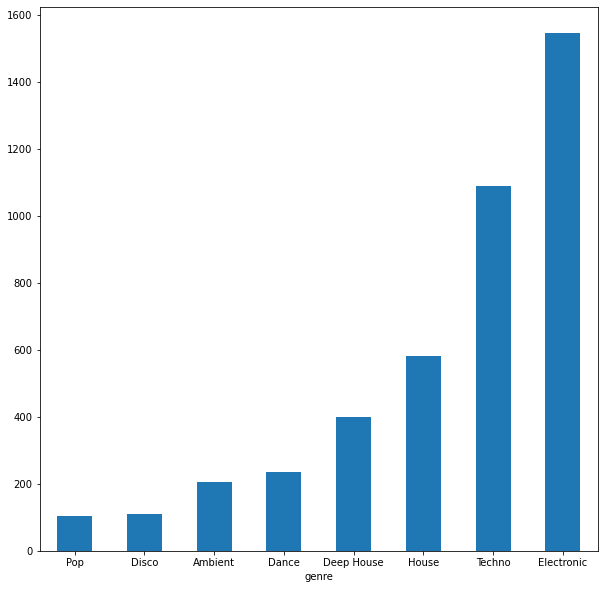

In [62]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = genre_count_series.plot.bar(x='genre', rot=0)

#### Nhận xét:
- Biểu đồ trên trực quan hóa tỉ lệ thành phần thể loại của các track trong mẫu dữ liệu
- Nhìn vào biểu đồ , ta thấy đa số thể lại thuộc thể loại **Electronic** ( chiếm 36,2% ) tiếp theo là **Techno** ( chiếm 25,5%) , **House** ( 13,6%) , **Deep House** ( 9,43% ) , **Dance** (5,53 % ), **Ambient** (4,78%), **Disco** (2,6% ), **Pop** ( 2,46% )
- Tuy đây không phải là kết quả chính xác nhất , vì nhiều bài hát thiếu giá trị của trường **thể loại** đã bị loại bỏ , hay cách bài hát dô user tự đặc tả , tuy nhiên chỉ chiếm thiểu số , sẽ không ảnh hướng quá nhiều đến việc trực quan hoá


### Jointplot <a class="anchor" id="c3524"></a>

- [Jointplot](#c3524) cũng là một biểu đồ trong nhóm trực quan hóa mối quan hệ đa biến. 
- Một [Jointplot](#c3524) bao gồm ba biểu đồ con. Trong số ba biểu đồ, một biểu đồ hiển thị biểu đồ hai biến cho biết biến phụ thuộc (dependent variable) thay đổi như thế nào với biến độc lập (independent variable). Một biểu đồ khác được đặt theo chiều ngang ở trên cùng của biểu đồ đa biến và biểu đó đó cho thấy sự phân phối của biến độc lập (X), tương tự cho biểu đồ còn lại bên phải.

##### Mối quan hệ và sư phân bổ của số lượng bài hát (track_count) với số lượng playlist (playlist_count)

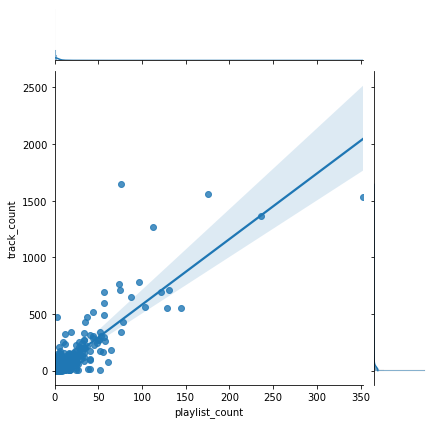

In [63]:
sns.jointplot(x = "playlist_count", y = "track_count",
              kind = "reg", data = df_users)
plt.show()

#### Kết quả biểu đồ trên cho thấy:
- Số lượng dữ liệu tập trung chủ yếu góc trái của trục tọa độ, xoay quanh giá trị 0 -> 500 cho số lượng track (track_count) và 0 -> 50 cho số lượng playlist (playlist_count)
- Biểu đồ trên thể hiện chưa tổng quan cho các giá trị tập trung
- Nên chúng ta sẽ loại bỏ những dữ liệu nằm ngoài phần góc trái của biểu đồ để chúng ta có thể nhìn rõ biểu đồ trực quan hơn

In [64]:
x = df_users["playlist_count"]
y = df_users["track_count"]

In [65]:
x = x[x < 10]
x

0       6
1       0
2       0
3       0
4       1
       ..
1758    1
1759    0
1760    0
1761    8
1762    0
Name: playlist_count, Length: 1579, dtype: int64

In [66]:
y = y[y < 100]
y

0       17
1        0
2        0
3        0
4        6
        ..
1758     5
1759     0
1760     2
1761    66
1762     0
Name: track_count, Length: 1650, dtype: int64

- Sau khi xem xét, chúng ta sẽ loại bỏ những điểm dữ liệu cho cả 2 tập "playlist_count" và "track_count":
    - Với "playlist_count" ta sẽ lấy những user có số playlist < 10
    - Còn với "track_count" tâ sẽ lấy điểm dữ liệu mà user có số track < 100

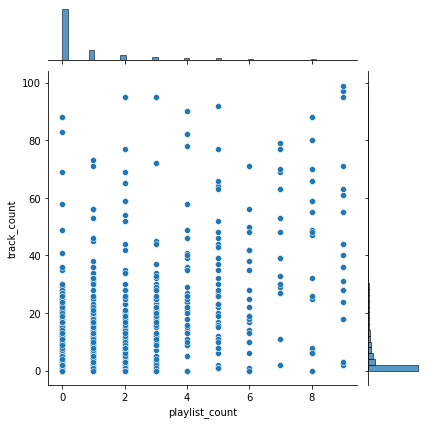

In [67]:
sns.jointplot(x = x, y = y, kind = "scatter", data = df_users)
plt.show()

#### Nhận xét:
- Mối quan hệ giữa "track_count" và "playlist_count" không phải tuyến tính
- Dữ liệu cho thấy đa số các user có số lượng track tập trung khoảng 30 tracks và tương ứng với số playlist nằm đa số trong khoảng từ 2 đến 3 playlist là chủ yếu
- Biểu đồ marginal plot cũng cho thấy sự phân bố đó:
    - Sự phân bổ playlist cao nhất năm ở vùng bên phía trái là khoảng 0 -> 2 playlist
    - Sự phân bổ track cũng tương tự, dữ liệu tập trung đa số sát biên bên phải, có giá trị khoảng 0 -> 5 track

### Kde plot <a class="anchor" id="c3525"></a>

- Trong thống kê, [Kde plot](#c3525) là một cách phi tham số để ước tính hàm mật độ xác suất của một biến ngẫu nhiên. [Kde plot](#c3525) là một bài toán giải pháp nhằm làm mịn dữ liệu cơ bản trong đó các suy luận về dân số được thực hiện dựa trên một mẫu dữ liệu hữu hạn.
- Ở phần này, chúng ta dùng [Kde plot](#c3525) để trả lời các câu hỏi về bộ dữ liệu của chúng ta, như là độ phân phối của một feature cụ thể, dạng phân phối, miền giá trị, mức độ tập trung giá trị của feature đang xét.

#### Mức độ phân phối của số lượng track (track_count)

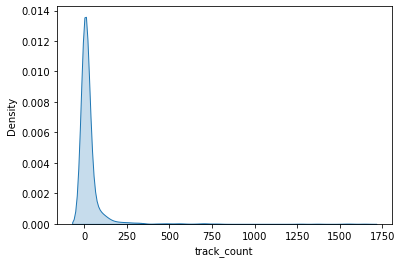

In [68]:
sns.kdeplot(df_users['track_count'], fill=True)
plt.show()

#### Nhận xét
- Biểu đồ trên cho ta thấy dạng phân phối của biến "track_count" đang lệch phải, một lượng nhỏ dữ liệu nằm trong khoảng từ 250 đến 1750. Cho nên biểu đồ trên không đạt dạng phân phối chuẩn.
- Miền giá trị của biểu đồ trải dài từ 0 đến 1750 
- Mức độ tập trung giá trị của các điểm dữ liệu chủ yếu quanh miền giá trị từ 0 đến 250 là chủ yếu
- Từ những nhận xét trên, ta có thể kết luận các users có số lượng track trung bình trong khoảng nhỏ 0 đến 100 tracks. Có lẽ có một chút ít người có số lượng track lớn, thể hiện ca sĩ nổi tiếng chưa tham gia trên SoundCloud ?

## Nguồn tham khảo <a class="anchor" id="c4"></a>

- <a href='https://drive.google.com/drive/u/0/folders/1Q4SiCkFViU_ODl__bqHzzHVTvmZ__8QV'>Lecture 04 - Data Visualization </a>
- <a href='https://drive.google.com/drive/u/0/folders/1Q4SiCkFViU_ODl__bqHzzHVTvmZ__8QV'>Lecture 05 - Data Preprocessing </a>
- <a href='https://matplotlib.org/stable/api/index.html'>Matplot libary </a>
- <a href='https://seaborn.pydata.org/index.html'>Seaborn libary </a>